In [68]:
import pandas as pd
pd.set_option("display.max_rows",None)

In [69]:
data=pd.read_csv(r"C:\Users\Ashish Aggarwal\OneDrive\Desktop\GGN BATCH 2022\NLP\Drug Review\drugsComTrain_raw.tsv",sep="\t")
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [70]:
data.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [71]:
new_data=data.loc[(data.condition=="Birth Control")|(data.condition=="Depression")|(data.condition=="High Blood Pressure")|(data.condition=="Diabetes, Type 2")]

In [72]:
data.shape

(161297, 7)

In [73]:
new_data.shape

(42732, 7)

In [74]:
X=new_data.drop(["Unnamed: 0","drugName","rating","date","usefulCount"],axis=1)

In [75]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
14,Birth Control,"""Started Nexplanon 2 months ago because I have..."


## EDA

In [76]:
X.condition.value_counts()

Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

In [77]:
X_bc=X[X.condition=="Birth Control"]
X_dep=X[X.condition=="Depression"]
X_db2=X[X.condition=="Diabetes, Type 2"]
X_hbp=X[X.condition=="High Blood Pressure"]

## Creating Worldcloud

In [78]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [79]:
from wordcloud import WordCloud

In [80]:
import matplotlib.pyplot as plt

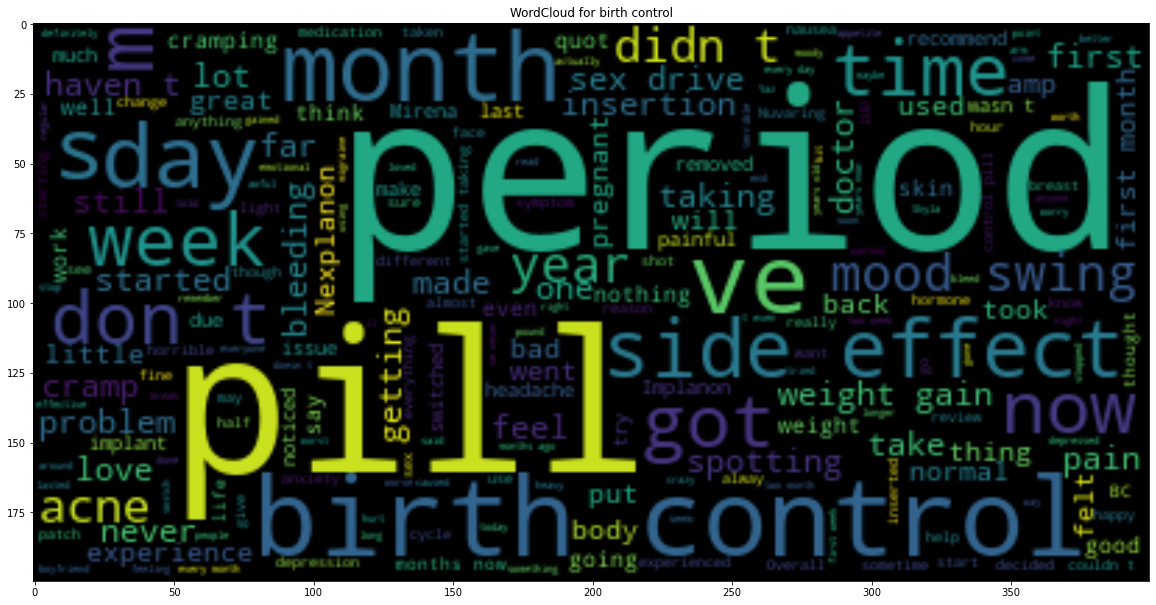

In [81]:
plt.figure(figsize=(20,20))
wc_bc=WordCloud(max_words=500).generate(" ".join(X_bc["review"]))
plt.imshow(wc_bc,interpolation="bilinear")
plt.title("WordCloud for birth control")
plt.show()

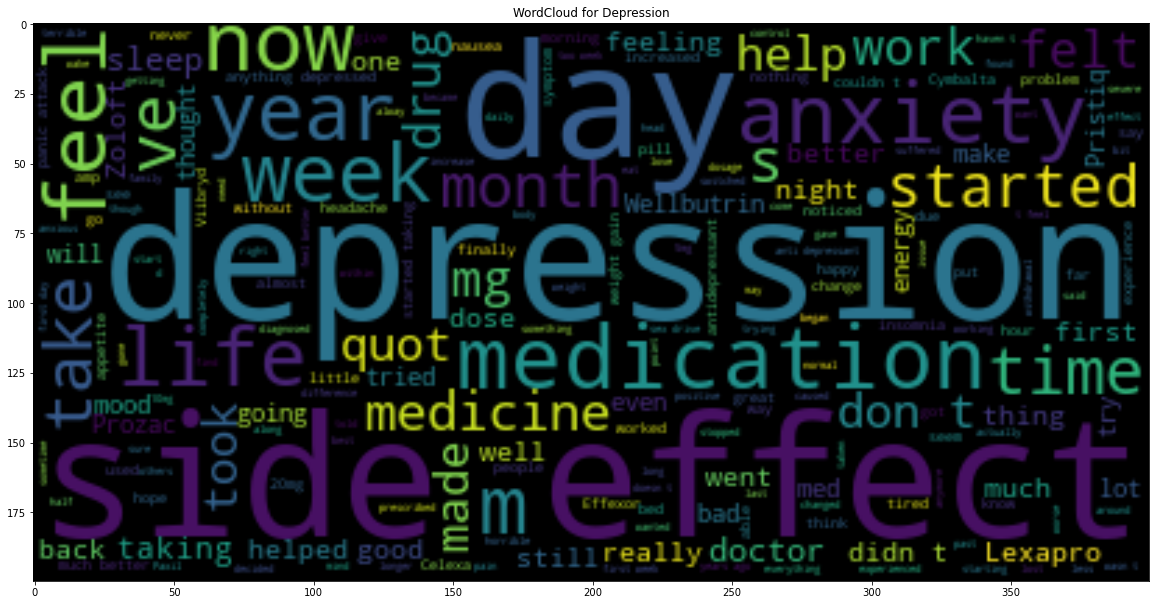

In [82]:
plt.figure(figsize=(20,20))
wc_dep=WordCloud(max_words=500).generate(" ".join(X_dep["review"]))
plt.imshow(wc_dep,interpolation="bilinear")
plt.title("WordCloud for Depression")
plt.show()

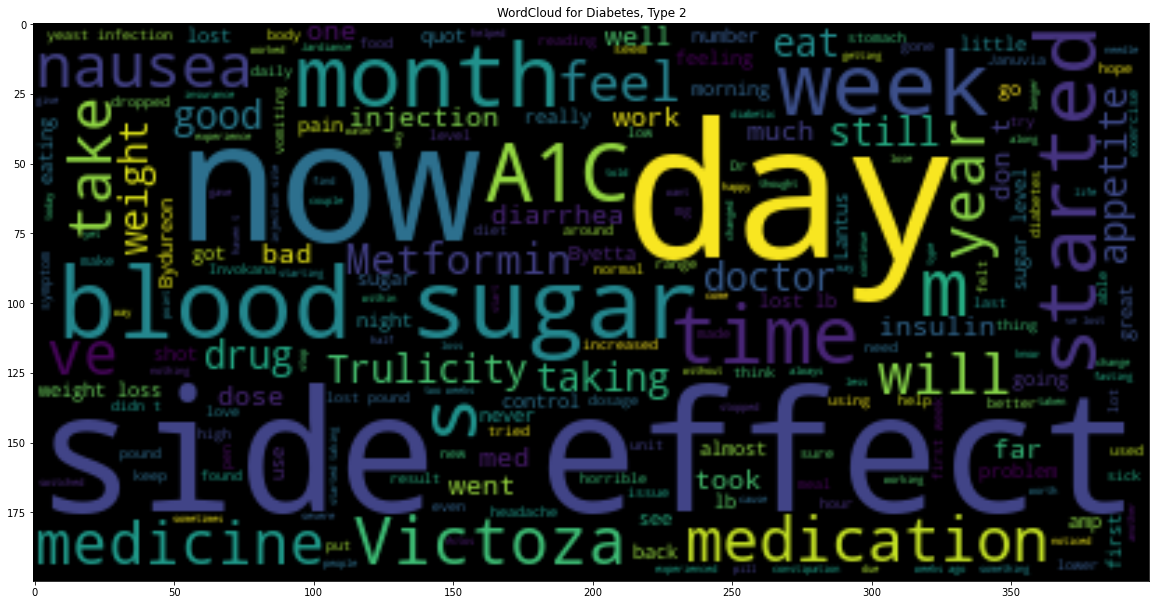

In [83]:
plt.figure(figsize=(20,20))
wc_db2=WordCloud(max_words=500).generate(" ".join(X_db2["review"]))
plt.imshow(wc_db2,interpolation="bilinear")
plt.title("WordCloud for Diabetes, Type 2")
plt.show()

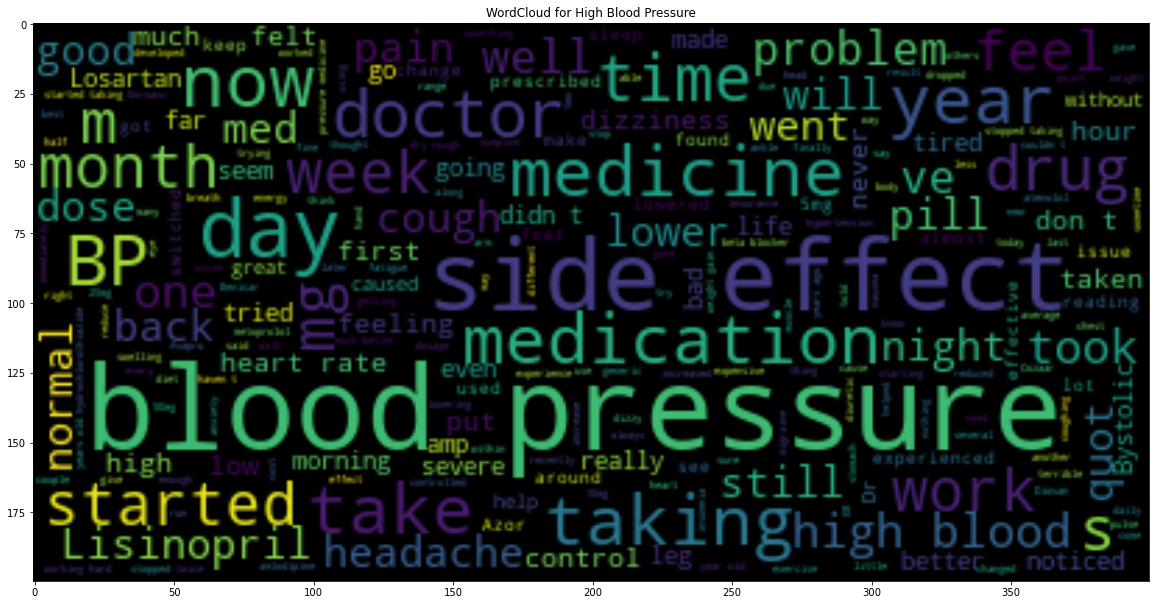

In [84]:
plt.figure(figsize=(20,20))
wc_hbp=WordCloud(max_words=500).generate(" ".join(X_hbp["review"]))
plt.imshow(wc_hbp,interpolation="bilinear")
plt.title("WordCloud for High Blood Pressure")
plt.show()

In [95]:
X.reset_index(drop=True,inplace=True)

In [110]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [111]:
lemmatizer=WordNetLemmatizer()

for i in range(X.shape[0]):
    review=re.sub("[^a-zA-Z]"," ",X.review[i])
    review=review.lower().split()
    review=[word for word in review if not word in stopwords.words("english")]
    review=[lemmatizer.lemmatize(word) for word in review]
    return(" ".join(review))

In [112]:
def pre_proc(text):
    review=re.sub("[^a-zA-Z]"," ",text)
    review=review.lower().split()
    review=[word for word in review if not word in stopwords.words("english")]
    review=[lemmatizer.lemmatize(word) for word in review]
    return(" ".join(review))

In [113]:
X["Clean_review"]=X["review"].apply(pre_proc)

In [114]:
X.head()

,condition,review,Clean_review
0,Birth Control,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive pill cycl...
1,Birth Control,"""This is my first time using any form of birth...",first time using form birth control glad went ...
2,Birth Control,"""I had been on the pill for many years. When m...",pill many year doctor changed rx chateal effec...
3,Depression,"""I have taken anti-depressants for years, with...",taken anti depressant year improvement mostly ...
4,Birth Control,"""Started Nexplanon 2 months ago because I have...",started nexplanon month ago minimal amount con...


In [116]:
X.review[1]

'"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"'

In [117]:
X.Clean_review[1]

'first time using form birth control glad went patch month first decreased libido subsided downside made period longer day exact used period day max also made cramp intense first two day period never cramp using birth control happy patch'

## Splitting Dataset into train and test

In [127]:
x=X["Clean_review"]
y=X["condition"]

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [130]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(34185,)
(8547,)
(34185,)
(8547,)


## Bag of Words

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

In [188]:
cv=CountVectorizer(ngram_range=(1,1))
cv_train=cv.fit_transform(xtrain)
cv_test=cv.transform(xtest)

#### Machine Learning model on Multinomial Naive Bayes

In [189]:
from sklearn.naive_bayes import MultinomialNB

In [190]:
mnb=MultinomialNB()
model_mnb_bow=mnb.fit(cv_train,ytrain)
ypred=model_mnb_bow.predict(cv_test)

In [191]:
from sklearn.metrics import accuracy_score,classification_report

In [192]:
accuracy_score(ytest,ypred)

0.9702819702819703

In [193]:
print(classification_report(ytest,ypred))

                     precision    recall  f1-score   support

      Birth Control       0.99      0.99      0.99      5758
         Depression       0.95      0.96      0.96      1814
   Diabetes, Type 2       0.93      0.90      0.91       511
High Blood Pressure       0.90      0.86      0.88       464

           accuracy                           0.97      8547
          macro avg       0.94      0.93      0.93      8547
       weighted avg       0.97      0.97      0.97      8547



## TF-IDF

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [165]:
tfidf=TfidfVectorizer()
tfidf_train=tfidf.fit_transform(xtrain)
tfidf_test=tfidf.transform(xtest)

#### Machine Learning model on Multinomial Naive Bayes

In [166]:
from sklearn.naive_bayes import MultinomialNB

In [167]:
mnb=MultinomialNB()
model_mnb_tfidf=mnb.fit(tfidf_train,ytrain)
y_pred_tfidf=model_mnb_tfidf.predict(tfidf_test)

In [168]:
accuracy_score(ytest,y_pred_tfidf)

0.913068913068913

In [169]:
print(classification_report(ytest,y_pred_tfidf))

                     precision    recall  f1-score   support

      Birth Control       0.91      1.00      0.95      5758
         Depression       0.92      0.88      0.90      1814
   Diabetes, Type 2       0.99      0.51      0.68       511
High Blood Pressure       0.99      0.42      0.59       464

           accuracy                           0.91      8547
          macro avg       0.95      0.70      0.78      8547
       weighted avg       0.92      0.91      0.90      8547



# Sample Predictions

In [200]:
X.iloc[451]["review"]

'"I&#039;ve only been on Paxil for about two weeks, but I can already tell a significant difference. I&#039;m feeling much more optimistic, and much more motivated than I was before going on the medication. That being said, my sex drive has dropped and I also have trouble urinating sometimes."'

In [201]:
X.iloc[451]

condition                                              Depression
review          "I&#039;ve only been on Paxil for about two we...
Clean_review    paxil two week already tell significant differ...
Name: 451, dtype: object

In [203]:
text=["""I&#039;ve only been on Paxil for about two weeks, but I can already tell a significant difference. I&#039;m feeling much more optimistic, and much more motivated than I was before going on the medication. That being said, my sex drive has dropped and I also have trouble urinating sometimes."""]
test=tfidf.transform(text)
mnb.predict(test)[0]

'Depression'

In [208]:
text=["fatigue"]
test=tfidf.transform(text)
mnb.predict(test)[0]

'Birth Control'